In [1]:
import stlearn as st
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
st.settings.set_figure_params(dpi=300)

In [4]:
# heart shape
BASE_PATH = Path("/30days/uqxtan9/kidney_visium/Visium_1")

TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_BASE = BASE_PATH / "QC_resluts_heart_shape"
OUT_BASE.mkdir(parents=True, exist_ok=True)

In [ ]:
# A1
BASE_PATH = Path("/30days/uqxtan9/kidney_visium/A1")

TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_BASE = BASE_PATH / "QC_resluts_A1"
OUT_BASE.mkdir(parents=True, exist_ok=True)

In [ ]:
# B1
BASE_PATH = Path("/30days/uqxtan9/kidney_visium/B1")

TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_BASE = BASE_PATH / "QC_resluts_B1"
OUT_BASE.mkdir(parents=True, exist_ok=True)

In [ ]:
# C1
BASE_PATH = Path("/30days/uqxtan9/kidney_visium/C1")

TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_BASE = BASE_PATH / "QC_resluts_C1"
OUT_BASE.mkdir(parents=True, exist_ok=True)

In [ ]:
# D1
BASE_PATH = Path("/30days/uqxtan9/kidney_visium/D1")
BC_PATH = BASE_PATH / "tissue_barcodes.csv"
TILE_PATH = BASE_PATH / "tiles"
TILE_PATH.mkdir(parents=True, exist_ok=True)
OUT_BASE = BASE_PATH / "QC_resluts_D1"
OUT_BASE.mkdir(parents=True, exist_ok=True)

In [5]:
data = st.Read10X(BASE_PATH)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [ ]:
# # D1
# bc_df = pd.read_csv(BC_PATH, index_col=0)
# data.obs["region"] = bc_df.Tissue
# data = data[data.obs["region"] == "Left"]
# data = data[data.obs["region"] == "Right"]

/90days/uqxtan9/.conda/envs/stlearn0.2/lib/python3.7/site-packages/ipykernel_launcher.py:119: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


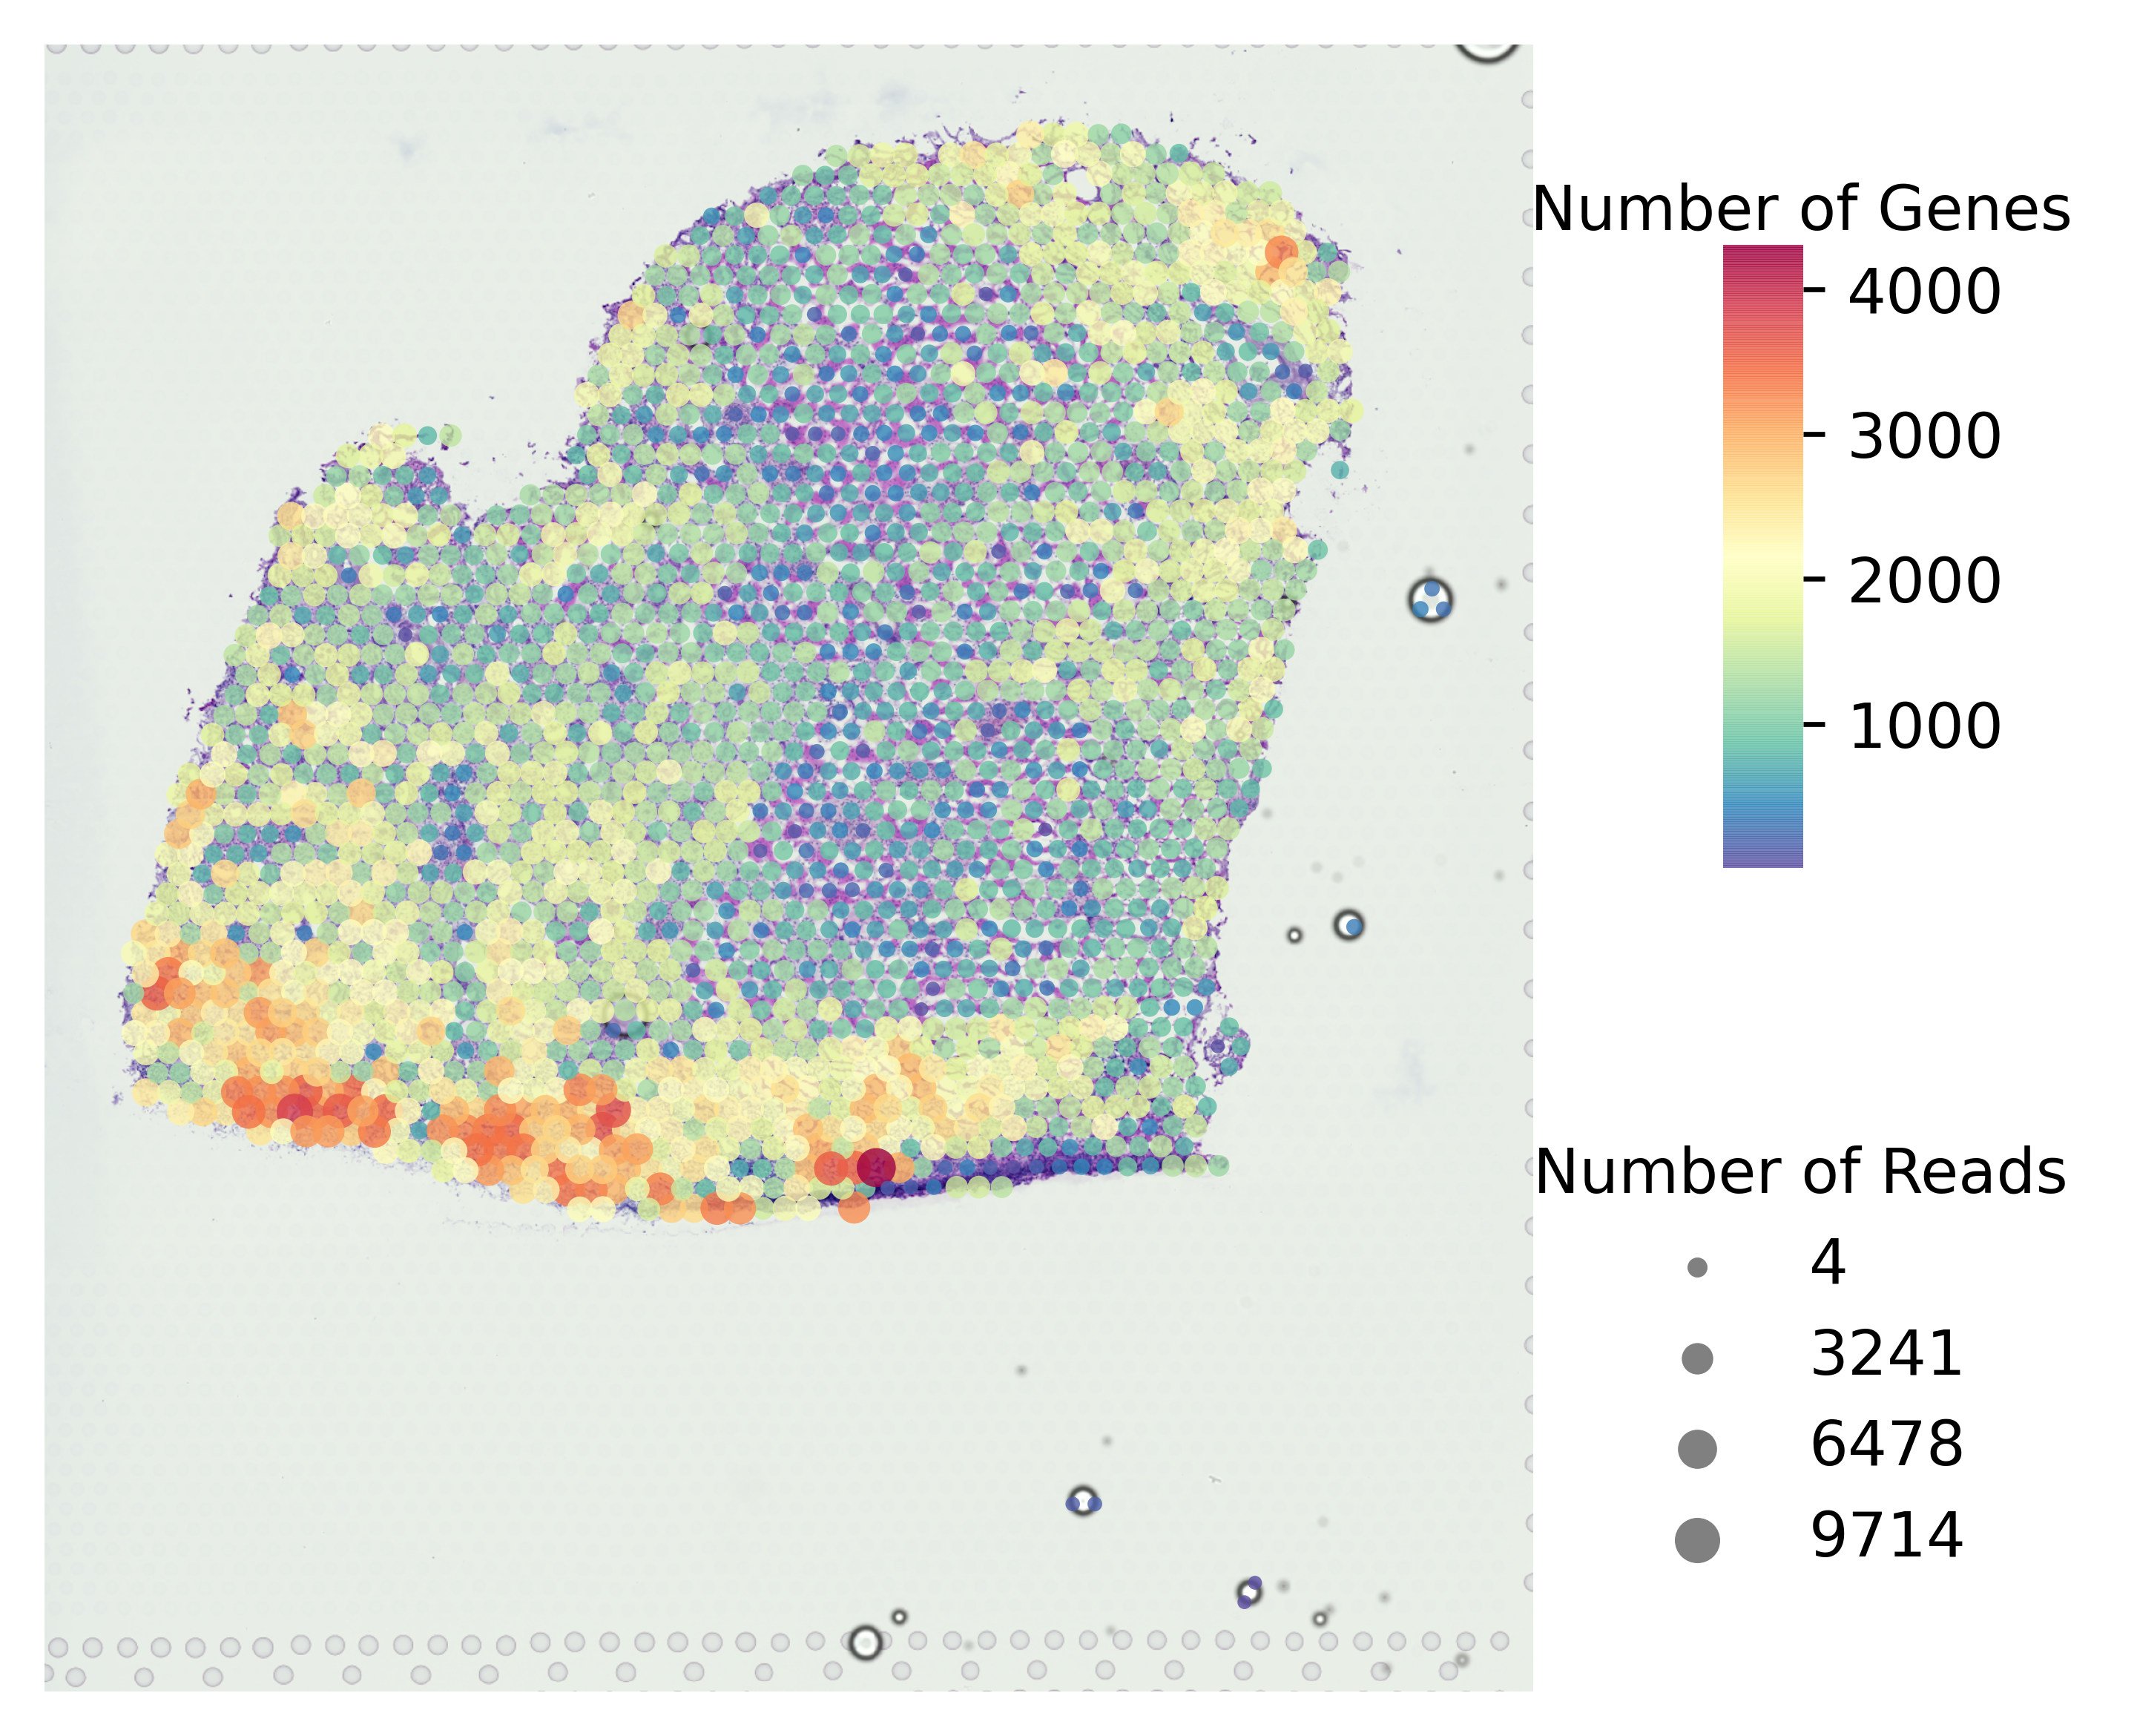

In [6]:
# QC plot
st.pl.QC_plot(data)

In [7]:
reads_per_spot = data.to_df().sum(axis=1)
genes_per_spot = data.to_df().astype(bool).sum(axis=1)

In [8]:
df = pd.DataFrame([reads_per_spot, genes_per_spot], index=["reads_per_spot", "genes_per_spot"]).transpose()

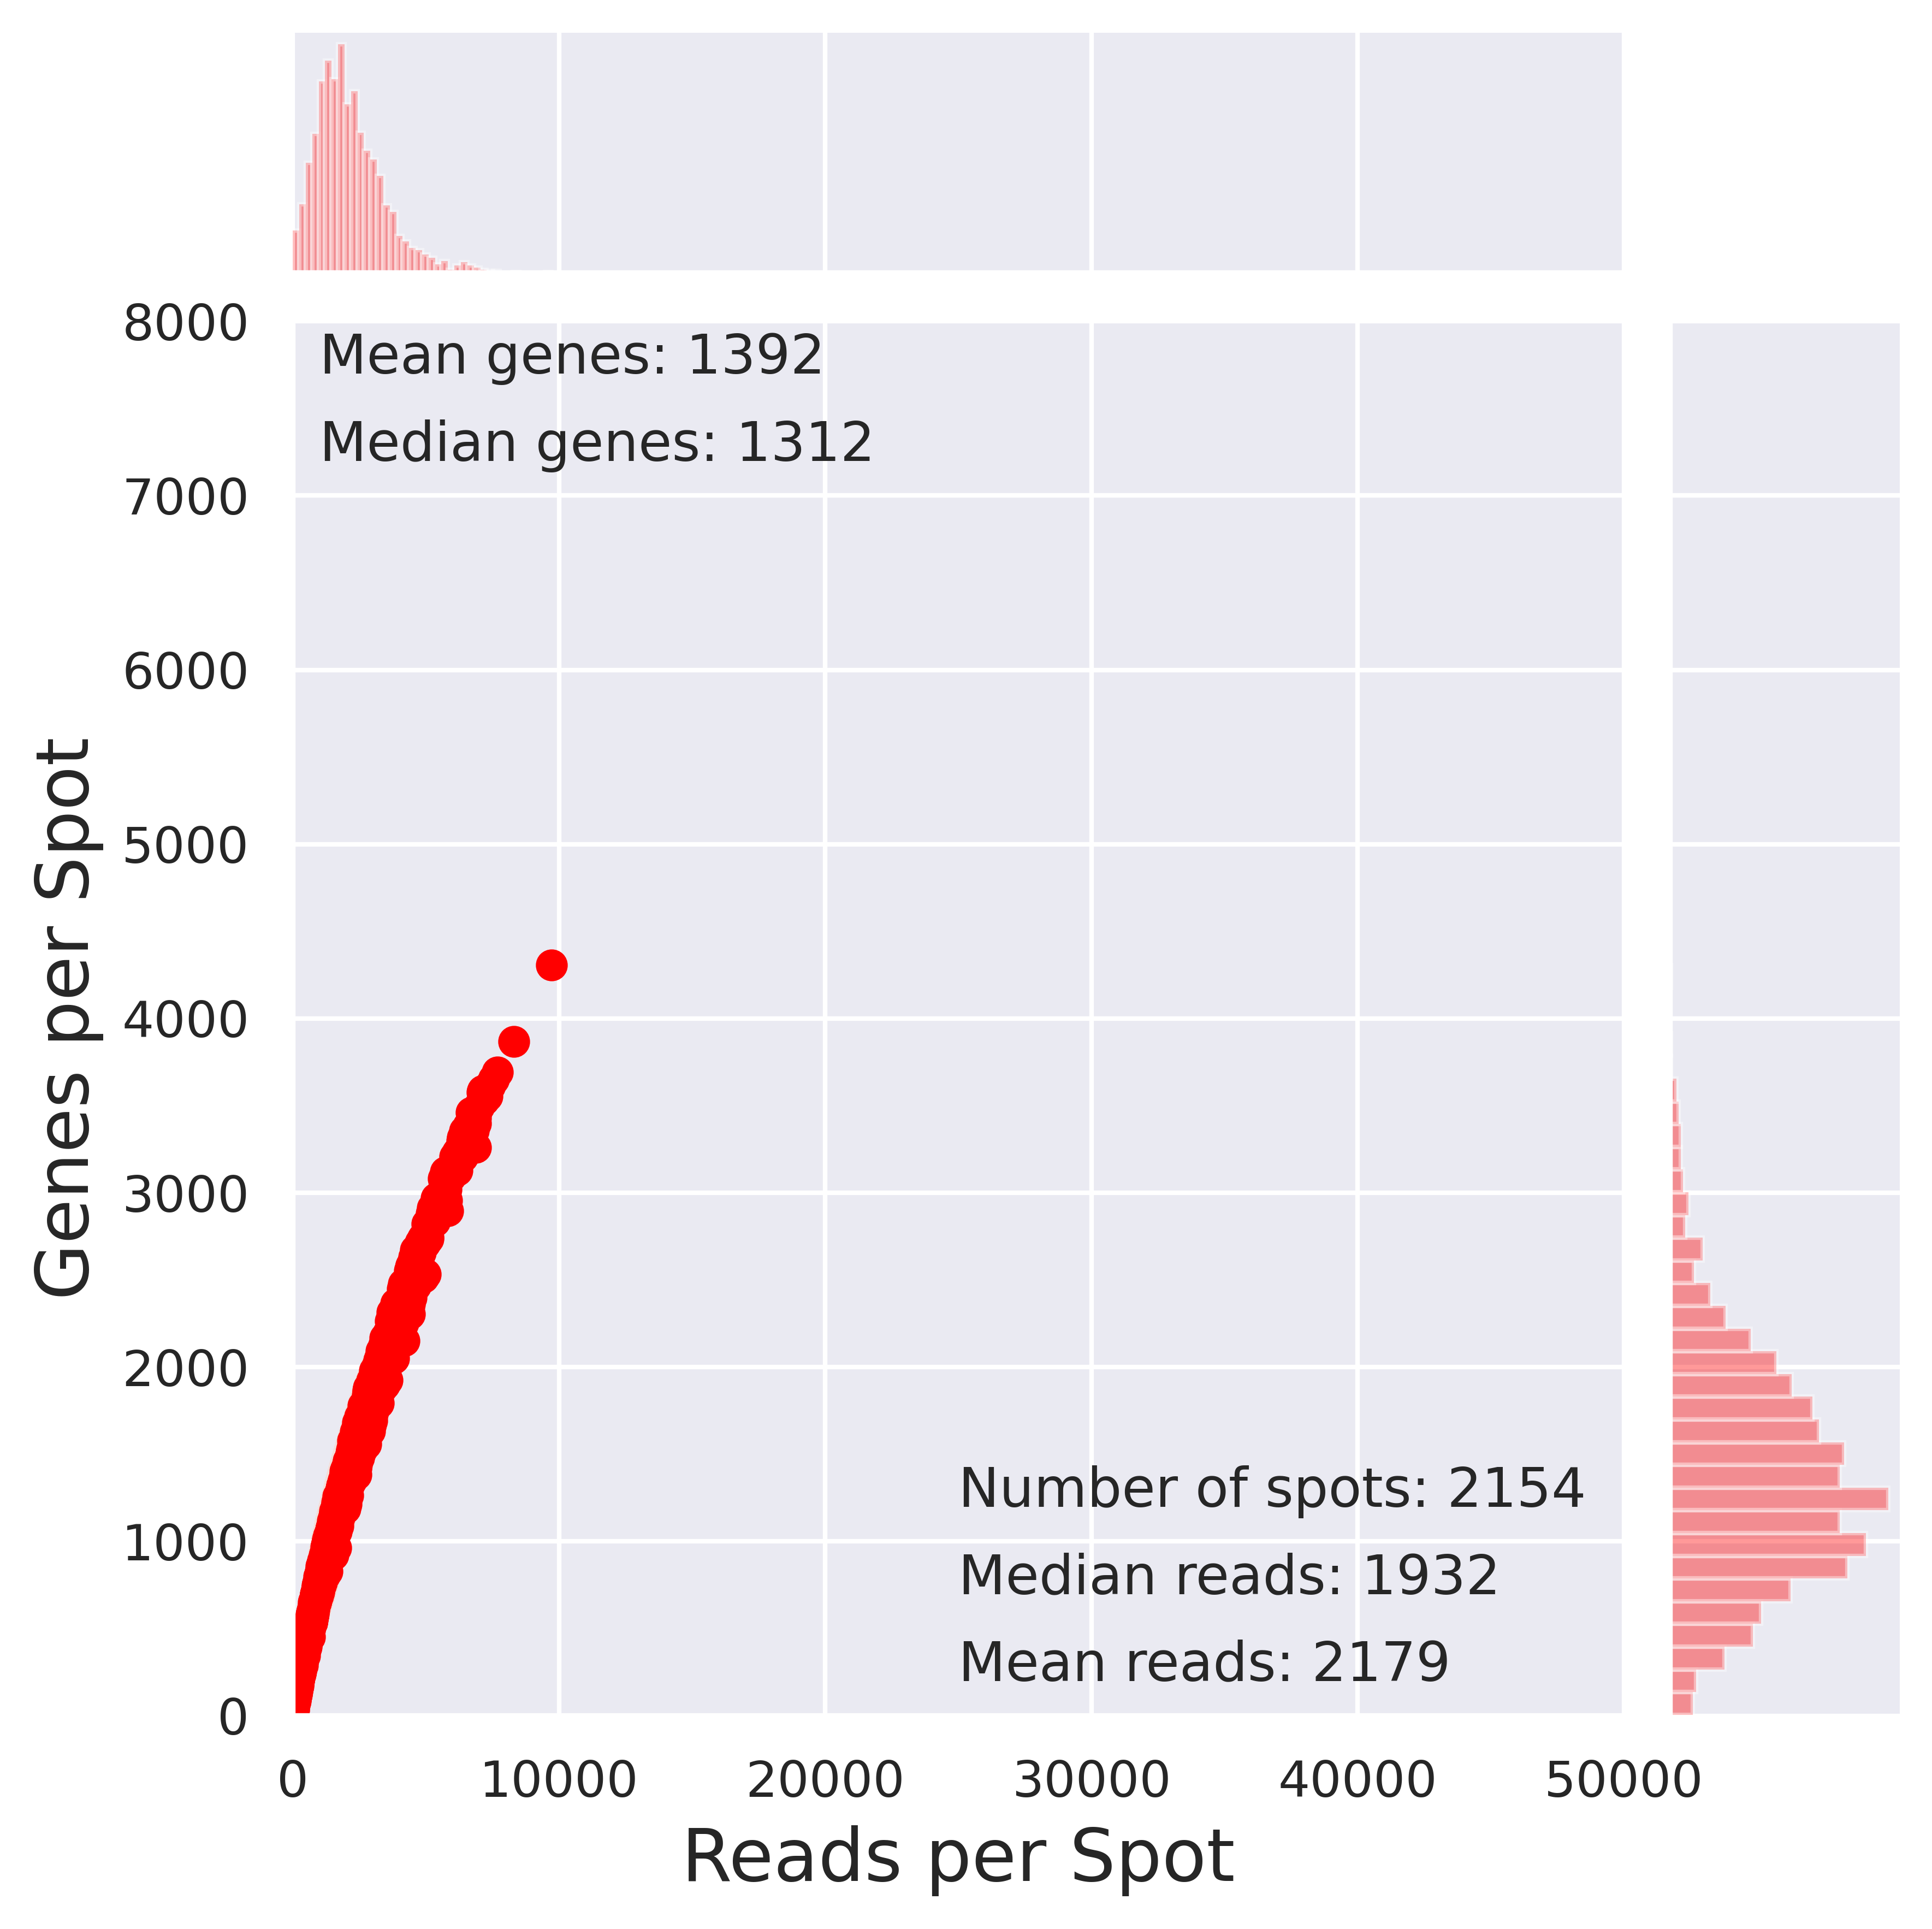

In [9]:
sns.set()
g = sns.jointplot("reads_per_spot", "genes_per_spot", data=df, color = "red",
                     xlim=(0, 50000), ylim=(0, 8000)).plot_joint(sns.kdeplot, zorder=0, n_levels=10, cmap="Reds",                                                                 shade=True, shade_lowest=False, alpha=0.5)
g.set_axis_labels('Reads per Spot', 'Genes per Spot', fontsize=16)
g.ax_joint.text(1000,7700,'Mean genes: %i' % (df['genes_per_spot'].mean()))
g.ax_joint.text(1000,7200,'Median genes: %i' % (df['genes_per_spot'].median()))
g.ax_joint.text(25000,200,'Mean reads: %i' % (df['reads_per_spot'].mean()))
g.ax_joint.text(25000,700,'Median reads: %i' % (df['reads_per_spot'].median()))
g.ax_joint.text(25000,1200,'Number of spots: %i' % (df.shape[0]))
# plt.savefig(OUT_BASE / "QC_jointplot_hist.pdf") 
plt.show()